# HW 2: SVD and PCA for Machine Learning

```{warning}
The submission of the homeworks has **NO** deadline. You can submit them whenever you want, on Virtuale. You are only required to upload it on Virtuale **BEFORE** your exam session, since the Homeworks will be a central part of the oral exam. 

You are asked to submit the homework as one of the two, following modalities:
* A PDF (or Word) document, containing screenshoots of code snippets, screeshots of the results generated by your code, and a brief comment on the obtained results.
* A Python Notebook (i.e. a `.ipynb` file), with cells containing the code required to solve the indicated exercises, alternated with a brief comment on the obtained results in the form of a markdown cell. We remark that the code **SHOULD NOT** be runned during the exam, but the student is asked to enter the exam with all the programs **already executed**, with the results clearly visible on the screen.

Joining the oral exam with a non-executed code OR without a PDF file with the obtained results visible on that, will cause the student to be rejected.
```

## Visualizing dyad
Consider an image from `skimage.data`. For simplicity, say that $X \in \mathbb{R}^{m \times n}$ is the matrix representing that image. You are asked to visualize the dyad of the SVD Decomposition of $X$ and the result of compressing the image via SVD. In particular:

* Load the image into memory and compute its SVD;
* Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?
* Plot the singular values of $X$. Do you note something?
* Visualize the $k$-rank approximation of $X$ for different values of $k$. What do you observe?
* Compute and plot the approximation error $|| X − X_k ||_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $k$.
* Plot the compression factor: $c_k = 1 − \frac{k(m+n+1)}{mn}$ for increasing values of $k$.
* Compute the value $k$ such that $c_k = 0$ (i.e. when the compressed image requires the same amount of informations of those of the uncompressed image). What is the approximation error for this value of $k$? Comment.

It is strongly recommended (but not mandatory) to consider a grey-scale image for this exercise. You can also use an image downloaded from the web. Clearly, if your image will be an RGB image, then its shape will be `(m, n, 3)`, where the last dimension corresponds to the three channels (Red, Green, and Blue). Every point discussed in the Homework has to be done on each channel separately, and then aggregated back to an RGB image.

Original image


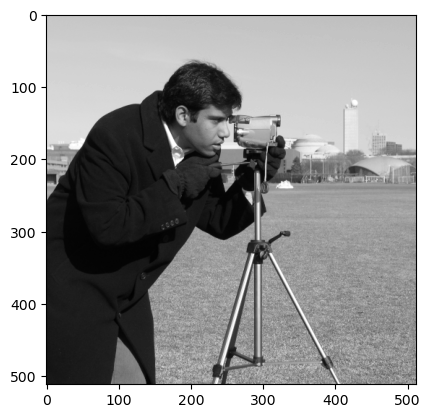

In [23]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

# Loading the "cameraman" image
A = skimage.data.camera()
m, n = A.shape
print("Original image")
plt.imshow(A, cmap="gray")
plt.show()

## Applying the decomposition
U, Sigma, VT = np.linalg.svd(A, full_matrices=False)





Dyad n 1


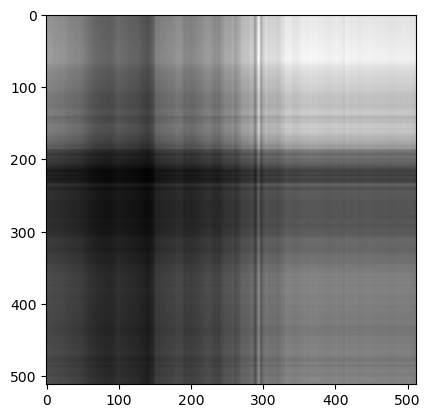

Dyad n 2


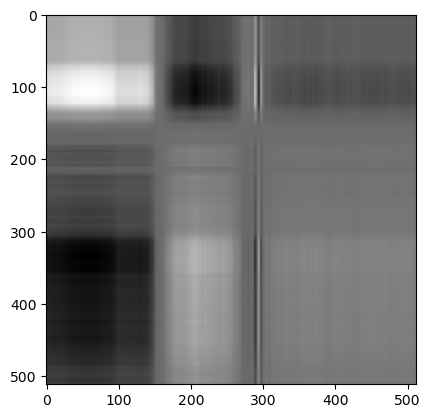

Dyad n 3


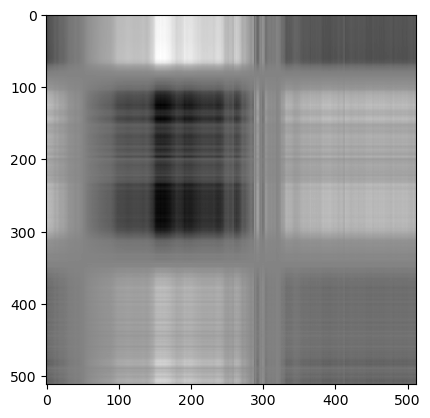

Dyad n 4


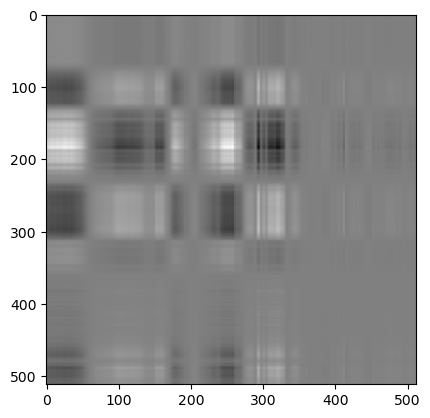

Dyad n 5


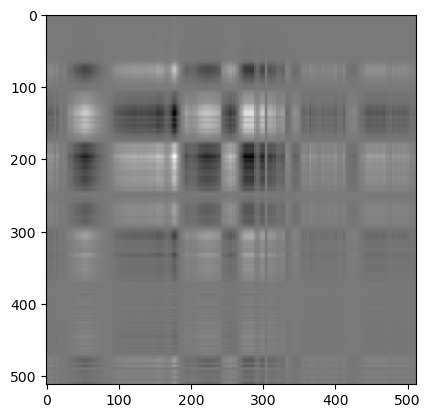

Dyad n 6


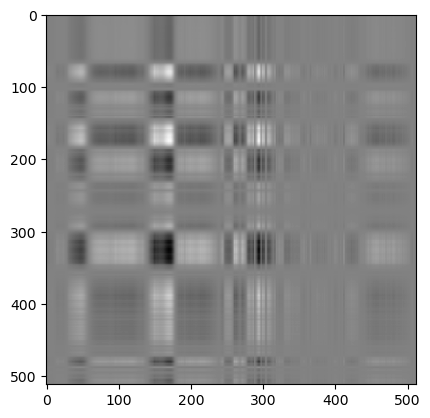

Dyad n 7


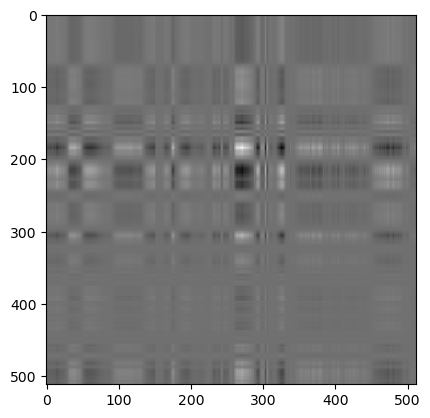

Dyad n 8


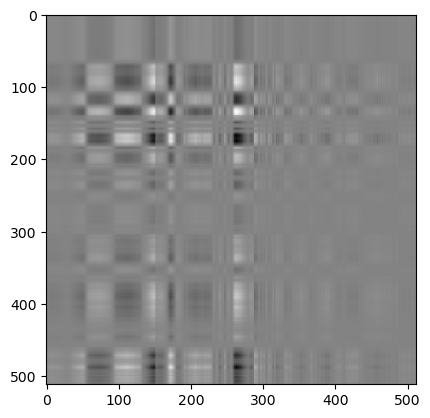

Dyad n 9


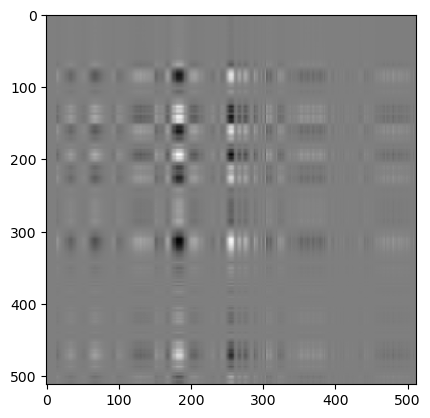

Dyad n 10


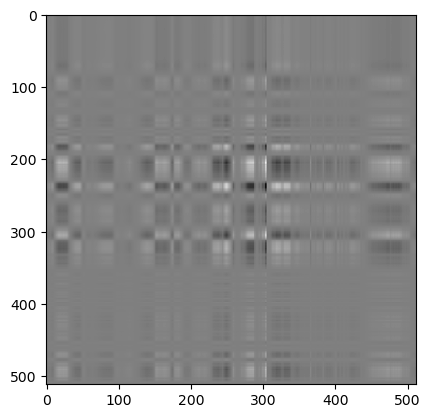

Dyad n 11


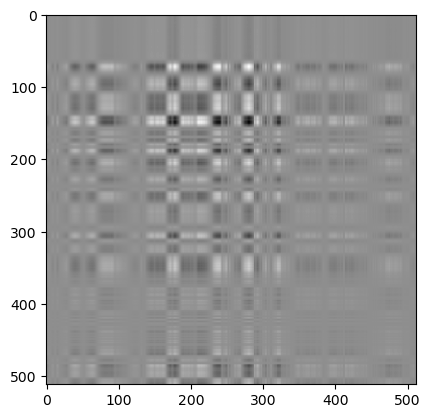

Dyad n 12


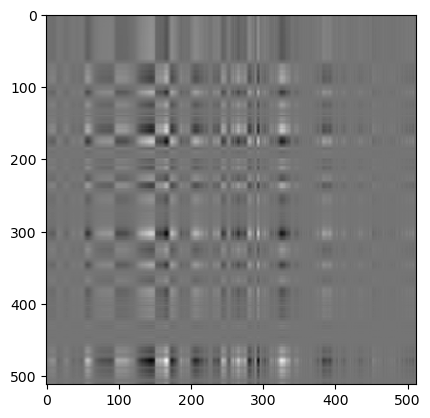

Dyad n 13


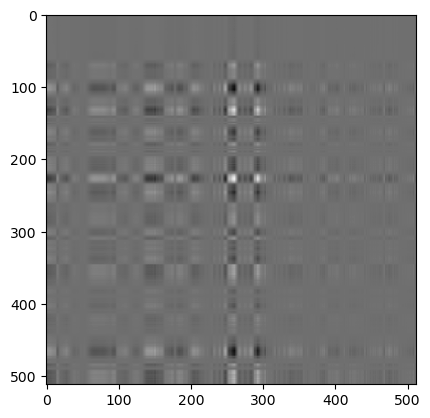

Dyad n 14


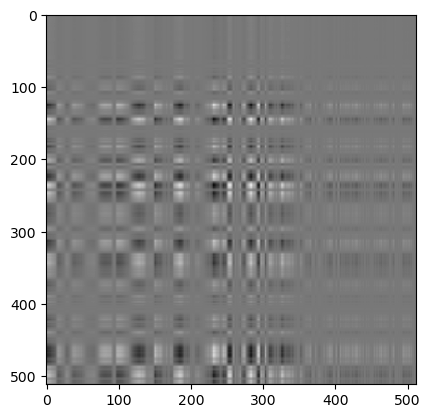

Dyad n 15


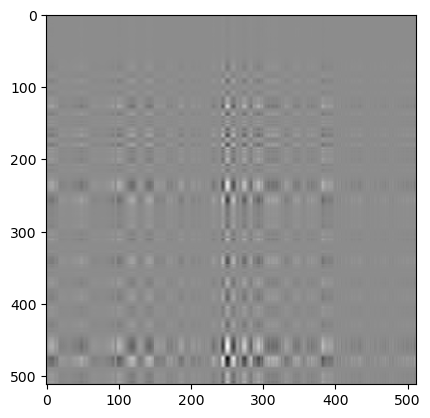

In [17]:
# Visualize some dyads
num_dyads = 15  # Number of dyads to visualize


for i in range(num_dyads):
    print(f"Dyad n {i+1}")
    ## We can omit the sigma value since woulf just scale our result, without adding information
    dyad = Sigma[i] * np.outer(U[:, i], VT[i, :])

    plt.imshow(dyad, cmap='gray')
    plt.show()


It's possible to notice how for higher dyad it's much harder to distinguish a familiar shape that resemble the original picture. The last pictures are much closer to noise than shapes. Iy may be because higher dyads capture more the details of the picture rather than the global view. This can be observed particularly comparing the first and the last dyad.

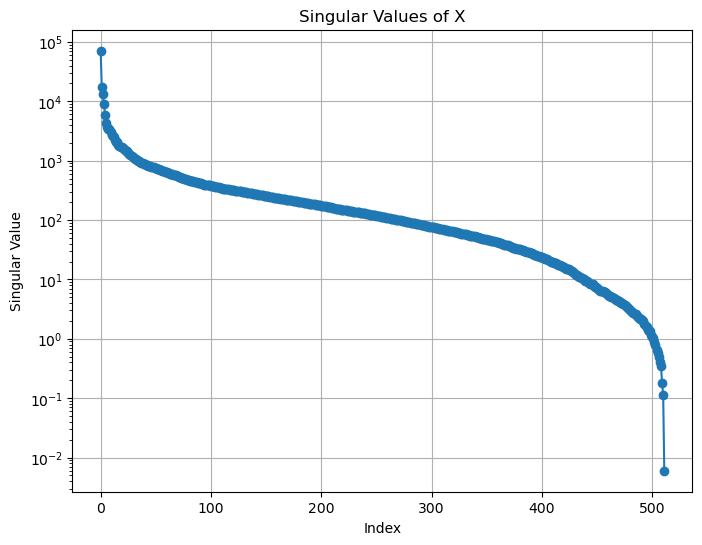

In [20]:
# Plot the singular values
plt.figure(figsize=(8, 6))
plt.plot(Sigma, marker='o')
plt.title("Singular Values of X")
plt.xlabel("Index")
plt.yscale("log")
plt.ylabel("Singular Value")
plt.grid()
plt.show()


Singular values decrease rapidly, indicating that only a few of them contribute significantly to the image structure. Each singular value represents indeed the importance of the i-th dyad. This might confirm the previews hypothesis for which the higher values dyads contribute more to the details rather than to the general picture.

Image from 1 elements in the sigma matrix diagonal


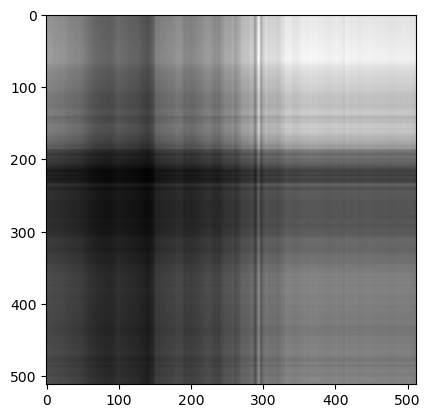

Image from 5 elements in the sigma matrix diagonal


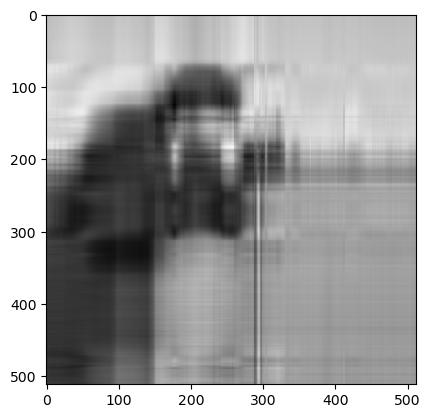

Image from 20 elements in the sigma matrix diagonal


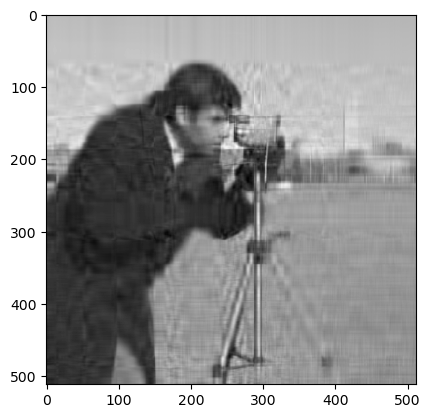

Image from 50 elements in the sigma matrix diagonal


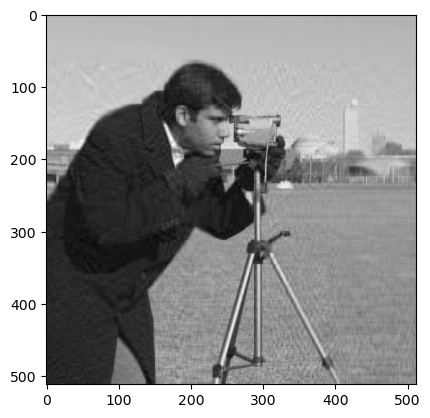

Image from 100 elements in the sigma matrix diagonal


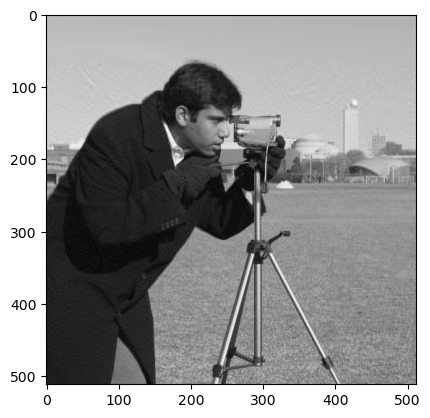

In [21]:
# Visualize k-rank approximations
ks = [1, 5, 20, 50, 100]  # Values of k to test
for k in ks:
    print(f"Image from {k} elements in the sigma matrix diagonal")
    U_k = U[:, :k]
    Sigma_k = np.diag(Sigma[:k])
    VT_k = VT[:k, :]
    A_compressed = U_k @ Sigma_k @ VT_k
    plt.imshow(A_compressed, cmap="gray")
    plt.show()


We have the final proof that the first elements of the matrices contribute only to the general shape of the picture, which becomes more and more clear with the increase of the rank


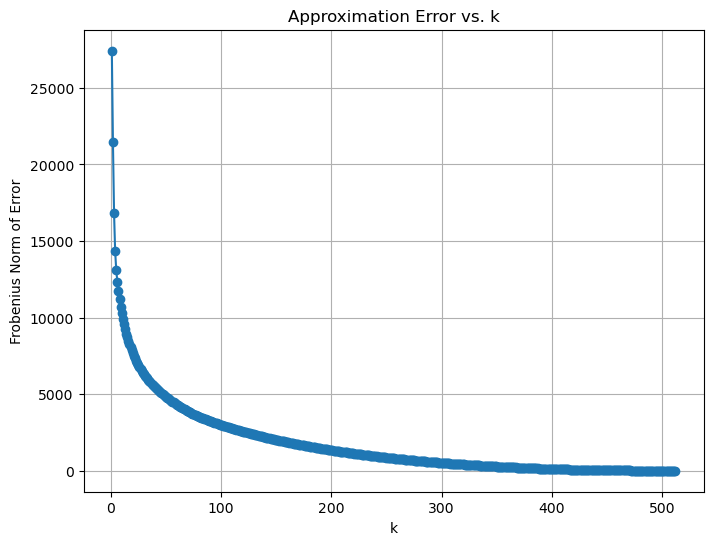

In [25]:
# Compute the Frobenius norm for each k
errors = []
for k in range(1, min(m, n) + 1):
    A_k = U[:, :k] @ np.diag(Sigma[:k]) @ VT[:k, :]
    error = np.linalg.norm(A - A_k, ord='fro')
    errors.append(error)

# Plot the errors
plt.figure(figsize=(8, 6))
plt.plot(range(1, min(m, n) + 1), errors, marker='o')
plt.title("Approximation Error vs. k")
plt.xlabel("k")
plt.ylabel("Frobenius Norm of Error")
# plt.yscale("log")
plt.grid()
plt.show()


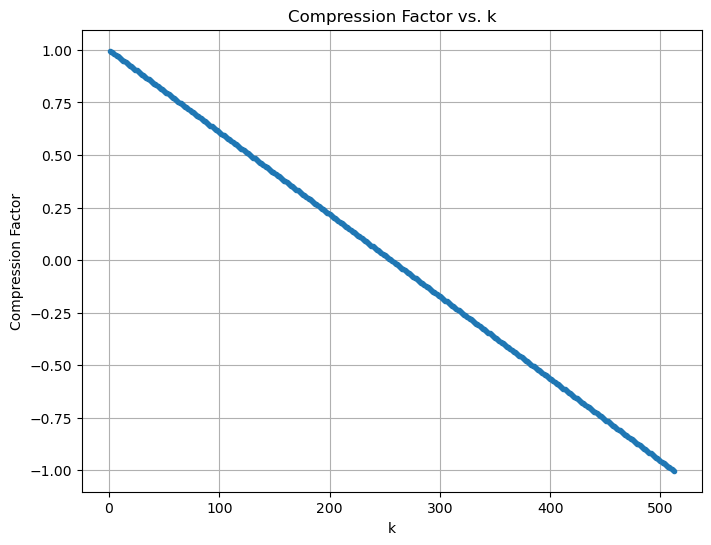

In [28]:
# Compute compression factor
compression_factors = []
for k in range(1, min(m, n) + 1):
    compression_factor = 1 - (k * (m + n + 1)) / (m * n)
    compression_factors.append(compression_factor)

# Plot compression factors
plt.figure(figsize=(8, 6))
plt.plot(range(1, min(m, n) + 1), compression_factors, marker='.')
plt.title("Compression Factor vs. k")
plt.xlabel("k")
plt.ylabel("Compression Factor")
plt.grid()
plt.show()


In [26]:
# Find k where c_k = 0
total_params = m * n
for k in range(1, min(m, n) + 1):
    compression_factor = 1 - (k * (m + n + 1)) / (m * n)
    if compression_factor <= 0:
        break

approximation_error = errors[k - 1]
print(f"k when c_k = 0: {k}")
print(f"Approximation error when c_k = 0: {approximation_error}")


k when c_k = 0: 256
Approximation error when c_k = 0: 810.6223365797816


Apparently, the image matrix contains double the data of the information it really expresses

## Classification of MNIST Digits with SVD Decomposition.
For this exercise we aim to develop a classification algorithm on MNIST digits using SVD decomposition.
We recall that, given a matrix $X \in \mathbb{R}^{d \times N}$ and its SVD decomposition $X = USV^T$, it is easy to show that an orthogonal basis for the space of the columns is given by the first $p$ columns of the matrix $U$, where $p = rank(X)$ is equal to the number of non-zero singular values of $X$. We will make use of the space of the columns defined by the $U$ matrix and the following Theorem:

**Theorem 1.** Let $W$ be a subspace of $\mathbb{R}^d$ with $dim W = s$, and let ${w_1, \dots, w_s}$ be an orthogonal basis of $W$. Then, for any $x \in \mathbb{R}^d$, the projection $x^\perp$ of $x$ onto $W$ has the following form:

$$
x^\perp = \frac{x \cdot w_1}{w_1 \cdot w_1} w_1 + \dots + \frac{x \cdot w_s}{w_s \cdot w_s} w_s.
$$

**Corollary 1.1.** Let $X \in \mathbb{R}^{d \times N}$ be a matrix with SVD decomposition $X = USV^T$, since $p = rank(X)$ is the dimension of the space defined by the columns of $X$ and the columns of $U$, ${u_1, \dots, u_p}$ are an orthonormal basis for that space, the projection of an $d$-dimensional vector $x$ on this space can be easily
computed as:

$$
x^\perp = U(U^T x).
$$

Consider as an example a binary classification problem, where we want to distinguish between hand-written digit representing numbers 3 and 4. We will refer to the class of the images representing number 3 as $C_1$, and to the set of images representing the number 4 as $C_2$. Let $N_1$ be the number of elements in $C_1$, and $N_2$ be the number of elements in $C_2$. Let $X_1 \in \mathbb{R}^{d \times N_1}$ be the matrix such that its columns are a flatten version of each digit in $C_1$, $X_2 \in \mathbb{R}^{d \times N_2}$ be the matrix such that its columns are a flatten version of each digit in $C_2$, and consider:

$$
X_1 = U_1S_1V_1^T, \\
X_2 = U_2S_2V_2^T,
$$

the SVD decomposition of the two matrices.

If $x \in \mathbb{R}^{d}$ is a new, unknown digit, we can predict its class through our classification algorithm by projecting it onto the spaces induced by the SVD of $X_1$ and $X_2$ via:

$$
x_1^\perp = U_1(U_1^T x), \\
x_2^\perp = U_2(U_2^T x),
$$

and classify $x$ as an element of either $C_1$ or $C_2$ based on $||x − x_1^\perp ||_2$ being greater of lower than $||x−x_2^\perp ||_2$, respectively. In this exercise, you are required to implement this idea in Python.

```{warning}
The description provided up to this point is only meant to understand the basic idea of the algorithm we aim to implement. From now on, I will list the point you are effectively required to implement in Python, therefore I will start re-defining some quantities, possibly overlapping with some discussion already made.
```

1. Implement the binary classification algorithm discussed above for the digits 3 and 4 of MNIST dataset. Follow these steps:
   * Download the MNIST dataset from [kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer) and load it into memory by following the steps we did in the [PCA class](https://devangelista2.github.io/statistical-mathematical-methods/ML/PCA.html). When loaded into memory, this dataset appear as an array with shape $42000 \times 785$ , containining the flattened version of $42000$ $28 \times 28$ grayscale handwritten digits, plus a column representing the true class of the corresponding digit. By pre-processing the data as we did in class, you should obtain a matrix `X` containing the flattenened digits, with shape `(784, 42000)`, and a vector `Y` of the associated digit value, with a shape of `(42000,)`.
   * Write a function taking as input an index value `idx` and visualizes the image of `X` in the corresponding index (i.e. `X[idx, :]`). Use the function `plt.imshow`.
   * Filter from `X` only those elements that corresponds to digits 3 or 4. This can be done, for example, by using the boolean slicing of `numpy` arrays, as already discussed in class.
   * Split the obtained dataset in training and testing in a proportion of $80 : 20$. From now on, we will only consider the training set. The test set will be only used at the end of the exercise to test the algorithm.
   * Call `X1` and `X2` the submatrices of the training set, filtered by the two selected digits, corresponding to those element associated with number 3 (class `C1`), and with number 4 (class `C2`).
   * Compute the SVD decomposition of `X1` and `X2` with `np.linalg.svd(matrix, full_matrices=False)` and denote the $U$-part of the two decompositions as `U1` and `U2`.
   * Take an unknown digit $x$ from the test set, and compute $x_1^\perp = U_1(U_1^T x)$ and $x_2^\perp = U_2(U_2^T x)$.
   * Compute the distances $d_1 = || x − x_1^\perp ||_2$ and $d_2 = || x − x_2^\perp||_2$, and classify $x$ as $C_1$ if $d_1 < d_2$, as $C_2$ if $d_2 < d_1$.
   * Repeat the experiment for different values of $x$ in the test set. Compute the misclassification rate for this algorithm.
   * Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error?
   * Comment the obtained results.


Given a classification algorithm $f(x)$, which maps an input image $x$ into its predicted class, the misclassification rate on the test set is defined as:

$$
MR = \frac{1}{N_{test}} \sum_{i=1}^{N_test} \iota(f(x_i) == y_i),
$$

where $N_{test}$ is the number of elements in the test set, $(x_i, y_i)$ represents the $i$-th element of the test set, while $\iota(f(x_i) == y_i)$ is a function which is equal to 0 if $f(x_i)$ is equal to the true class $y_i$, while it is equal to 1 if $f(x_i)$ guesses the wrong digit (i.e. it is different from $y_i$). More simply, the Misclassification Rate represent the average number of error of the model over the test set.


2. The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than 2 classes (say, $k$ different classes) $C_1, \dots, C_k$, we just need to repeat the same procedure as before for each matrix $X_1, \dots, X_k$ to obtain the distances $d_1, \dots, d_k$. Then, the new digit $x$ from the test set will be classified as $C_i$ if $d_i$ is lower that $d_j$ for each $j = 1,...,k$. Repeat the exercise above with a 3-digit example. Comment the differences.

In [29]:
import kagglehub
import numpy as np
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("animatronbot/mnist-digit-recognizer")

print("Path to dataset files:", path)

# Load data into memory
data = pd.read_csv('../../mnist-digit-recognizer/versions/1/train.csv')




Path to dataset files: C:\Users\dales\.cache\kagglehub\datasets\animatronbot\mnist-digit-recognizer\versions\1


In [30]:
# Convert data into a matrix
data = np.array(data)

X = data[:, 1:]
X = X.T

Y = data[:, 0]

print(X.shape, Y.shape)

d, N = X.shape

(784, 42000) (42000,)


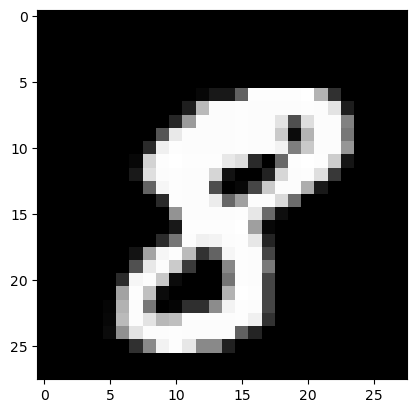

The associated digit is: 8


In [38]:
import matplotlib.pyplot as plt

def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap='grey')
    plt.show()

# Visualize image number 10 and the corresponding digit.
idx = 10 
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

In [39]:
## FIltering the data for the digits 3 and 4
filter_mask = np.isin(Y, [3, 4])  # Create a boolean mask
filtered_data = X[:, filter_mask]  # Apply mask to pixel data
filtered_labels = Y[filter_mask] 


In [40]:
from sklearn.model_selection import train_test_split
filtered_data = filtered_data.T 
X_train, X_test, y_train, y_test = train_test_split(filtered_data, filtered_labels, test_size=0.2, random_state=42)


In [41]:
X_train_T = X_train.T

In [ ]:
## We filter the train dataset again so to divide the inputs given their expected output

filter_mask_3 = np.isin(y_train, 3)  
filter_mask_4 = np.isin(y_train, 4) 

## Wr apply the mask
X1 = X_train_T[:, filter_mask_3]  
X2 = X_train_T[:, filter_mask_4]



In [46]:
# We then perform SVD decomposition
U1, S1, V1 = np.linalg.svd(X1, full_matrices=False)  # SVD of X1
U2, S2, V2 = np.linalg.svd(X2, full_matrices=False)  # SVD of X2

In [106]:
    
def classifier(n, random=True, verbose = False):
    if random:
        n = np.random.randint(0, X_test.shape[1])
    x = X_test[n]
    # print(x.shape)

    x1_T = U1@(U1.T@x)
    x2_T = U2@(U2.T@x)
    d1 = np.linalg.norm(x - x1_T, ord=2)  # L2 norm (Euclidean distance) for d1
    d2 = np.linalg.norm(x - x2_T, ord=2)

    if d1<d2 : 
        classification = 3
    else : 
        classification = 4
    if verbose:
        print(f"Your chosen value is ")
        X_train_T = X_train.T
        print(X_train_T.shape)
        visualize(X_train_T, n)
        print(f"its value is {classification}")
    # print(y_test[n],"----",classification)
    return classification
    
    

In [108]:
## Script for MR computation
n_err = 0
n = X_test.shape[1]
print(n)
for i in range(n):
    pred = classifier(i, random=False, verbose=False)
    if pred!= y_test[i]:
        n_err += 1
    
MR = n_err/n
print(f"your misclassification rate is: {round(MR, 3)}")

784
your misclassification rate is: 0.02


Your chosen value is 
(784, 6738)


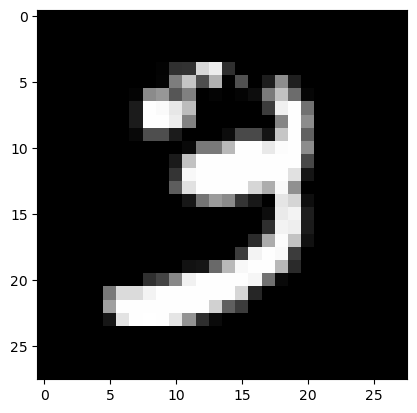

its value is 3


3

In [129]:
classifier(n, random=True, verbose=True)

We choose the digits of 1 and 0 because of how different they look. We are pretty confident that our model will recognise them with accuracy

In [151]:
# We choose a couple of digits for our experiment

a, b = 0, 1

In [152]:
## Repeating the experiment for other digits of the test_set
filter_mask = np.isin(Y, [a, b])  # Create a boolean mask
filtered_data = X[:, filter_mask]  # Apply mask to pixel data
filtered_labels = Y[filter_mask] 
from sklearn.model_selection import train_test_split
filtered_data_T = filtered_data.T 
X_train, X_test, y_train, y_test = train_test_split(filtered_data_T, filtered_labels, test_size=0.2, random_state=42)
X_train_T = X_train.T

## We filter the train dataset again so to divide the inputs given their expected output
filter_mask_1 = np.isin(y_train, a)  
filter_mask_2 = np.isin(y_train, b) 

## Wr apply the mask
X1 = X_train_T[:, filter_mask_1]  
X2 = X_train_T[:, filter_mask_2]

# We then perform SVD decomposition
U1, S1, V1 = np.linalg.svd(X1, full_matrices=False)  # SVD of X1
U2, S2, V2 = np.linalg.svd(X2, full_matrices=False)  # SVD of X2

# We then perform SVD decomposition
U1, S1, V1 = np.linalg.svd(X1, full_matrices=False)  # SVD of X1
U2, S2, V2 = np.linalg.svd(X2, full_matrices=False)  # SVD of X2

    
def classifier(n, random=True, verbose = False):
    if random:
        n = np.random.randint(0, X_test.shape[1])
    x = X_test[n]
    # print(x.shape)

    x1_T = U1@(U1.T@x)
    x2_T = U2@(U2.T@x)
    d1 = np.linalg.norm(x - x1_T, ord=2)  # L2 norm (Euclidean distance) for d1
    d2 = np.linalg.norm(x - x2_T, ord=2)

    if d1<d2 : 
        classification = a
    else : 
        classification = b
    if verbose:
        print(f"Your chosen value is ")
        X_train_T = X_train.T
        print(X_train_T.shape)
        visualize(X_train_T, n)
        print(f"its value is {classification}")
    # print(y_test[n],"----",classification)
    return classification
    
## Script for MR computation
n_err = 0
n = X_test.shape[1]
# print(n)
for i in range(n):
    pred = classifier(i, random=False, verbose=False)
    if pred!= y_test[i]:
        n_err += 1
    
MR = n_err/n
print(f"your misclassification rate is: {round(MR, 3)}")

your misclassification rate is: 0.009


We obtained a quite good result! Now we want to determine the robustness of our model having it distinguish between similar digits

In [149]:
# We choose a couple of digits for our experiment

a, b = 1, 7

In [150]:
## Repeating the experiment for other digits of the test_set
filter_mask = np.isin(Y, [a, b])  # Create a boolean mask
filtered_data = X[:, filter_mask]  # Apply mask to pixel data
filtered_labels = Y[filter_mask] 
from sklearn.model_selection import train_test_split
filtered_data_T = filtered_data.T 
X_train, X_test, y_train, y_test = train_test_split(filtered_data_T, filtered_labels, test_size=0.2, random_state=42)
X_train_T = X_train.T

## We filter the train dataset again so to divide the inputs given their expected output
filter_mask_1 = np.isin(y_train, a)  
filter_mask_2 = np.isin(y_train, b) 

## Wr apply the mask
X1 = X_train_T[:, filter_mask_1]  
X2 = X_train_T[:, filter_mask_2]

# We then perform SVD decomposition
U1, S1, V1 = np.linalg.svd(X1, full_matrices=False)  # SVD of X1
U2, S2, V2 = np.linalg.svd(X2, full_matrices=False)  # SVD of X2

# We then perform SVD decomposition
U1, S1, V1 = np.linalg.svd(X1, full_matrices=False)  # SVD of X1
U2, S2, V2 = np.linalg.svd(X2, full_matrices=False)  # SVD of X2

    
def classifier(n, random=True, verbose = False):
    if random:
        n = np.random.randint(0, X_test.shape[1])
    x = X_test[n]
    # print(x.shape)

    x1_T = U1@(U1.T@x)
    x2_T = U2@(U2.T@x)
    d1 = np.linalg.norm(x - x1_T, ord=2)  # L2 norm (Euclidean distance) for d1
    d2 = np.linalg.norm(x - x2_T, ord=2)

    if d1<d2 : 
        classification = a
    else : 
        classification = b
    if verbose:
        print(f"Your chosen value is ")
        X_train_T = X_train.T
        print(X_train_T.shape)
        visualize(X_train_T, n)
        print(f"its value is {classification}")
    # print(y_test[n],"----",classification)
    return classification
    
## Script for MR computation
n_err = 0
n = X_test.shape[1]
# print(n)
for i in range(n):
    pred = classifier(i, random=False, verbose=False)
    if pred!= y_test[i]:
        n_err += 1
    
MR = n_err/n
print(f"your misclassification rate is: {round(MR, 3)}")

your misclassification rate is: 0.108


It's possible to notice how with very similar digits (like 1 and 7) the MR is much higher compared to the one computed for the classification of more different looking digits (like 1 and 0)

Let's repeat the experiment with the digits 2, 3, 4

In [261]:
filter_mask_b = np.isin(Y, [2, 3, 4])  # Create a boolean mask
filtered_data_b = X[:, filter_mask_b]  # Apply mask to pixel data
filtered_labels_b = Y[filter_mask_b] 
filtered_data_b = filtered_data_b.T 
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(filtered_data_b, filtered_labels_b, test_size=0.2, random_state=42)
X_train_T_b = X_train_b.T
X_test_T_b = X_test_b.T

filter_mask_2_b = np.isin(y_train_b, 2)  # Create a boolean mask
filter_mask_3_b = np.isin(y_train_b, 3)  # Create a boolean mask
filter_mask_4_b = np.isin(y_train_b, 4)  # Create a boolean mask

X0_b = X_train_T_b[:, filter_mask_2_b]  # Apply mask to pixel data
X1_b = X_train_T_b[:, filter_mask_3_b]  # Apply mask to pixel data
X2_b = X_train_T_b[:, filter_mask_4_b]

U0_b, S0_b, V0_b = np.linalg.svd(X0_b, full_matrices=False)  # SVD of X1
U1_b, S1_b, V1_b = np.linalg.svd(X1_b, full_matrices=False)  # SVD of X1
U2_b, S2_b, V2_b = np.linalg.svd(X2_b, full_matrices=False)  # SVD of X2

def classifier_b(n, random=True, verbose = False):
    if random:
        n = np.random.randint(0, X_test_b.shape[1])
    x = X_test_b[n]

    x0_T = U0_b@(U0_b.T@x)
    x1_T = U1_b@(U1_b.T@x)
    x2_T = U2_b@(U2_b.T@x)
    d0 = np.linalg.norm(x - x0_T, ord=2)
    d1 = np.linalg.norm(x - x1_T, ord=2)  # L2 norm (Euclidean distance) for d1
    d2 = np.linalg.norm(x - x2_T, ord=2)
    h = {d1: 3, d2: 4, d0: 2}
    classification = h[min([d1, d2, d0])]

    if verbose:
        print(f"Your chosen value is ")
        print(X_test_T_b.shape)
        visualize(X_test_T_b, n)
        print(f"its predicted value is {classification}")
    # print(y_test_b[n],"----",classification)
    return classification

Your chosen value is 
(784, 2520)


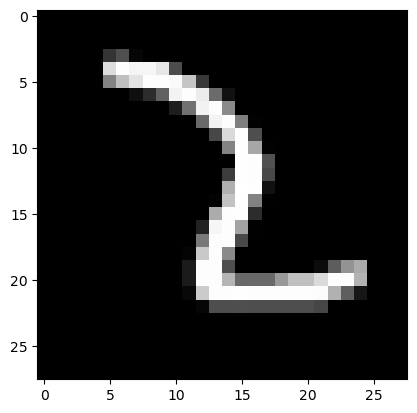

its predicted value is 2
2 ---- 2


2

In [259]:
classifier_b(0, random=True, verbose=True)

In [262]:
## Let's compare the MR for comparison
n_err = 0
n = X_test_b.shape[1]
# print(n)
for i in range(n):
    pred = classifier_b(i, random=False, verbose=False)
    if pred!= y_test_b[i]:
        n_err += 1
    
MR = n_err/n
print(f"your misclassification rate is: {round(MR, 3)}")

your misclassification rate is: 0.161


It's possible to notice how the misclassification rate worsened, due to more confusion of our model since it has more options to choose from, having closer representations of the digits. The outliers will then be closer to the wrong representation.


## Clustering with PCA
In this exercise we want to analyse the ability of PCA in clustering data by projecting very high-dimensional datapoints to 2 or 3 dimensions. In particular, consider the same MNIST dataset used in the previous exercise. You are asked to:
* Load and pre-process the dataset as did in the previous exercise, to get the matrix `X` with shape `(784, 42000)`, and the associated vector `Y`.
* Choose a number of digits (for example, 0, 6 and 9) and extract from `X` and `Y` the sub-dataset containing only the considered digits, as did in the previous exercise.
* Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from  `X` and `Y`. Call them `X_train` and `Y_train`. Everything else is the test set. Call them `X_test` and `Y_test`, correspondingly. This has to be done **after** filtering out the selected digits from `X` and `Y`.
* Implement the algorithms computing the PCA of `X_train` with a fixed value of $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster. The clusters are identified by projecting `X_train` via PCA to its low-dimension version `Z_train`, and then splitting it into sets (say, `Z1`, `Z2`, `Z3`) based on the digit that was represented in that position before the PCA projection. Each set `Z1`, `Z2`, `Z3` represents a cluster, of which we can easily compute the centroid.
* Compute, for each cluster, the average distance from its centroid. Which property of PCA projection does this quantity measure?
* By keeping the **same** projection matrix `P` from the train set, project the test set `X_test` on the low-dimensional space.
* Consider the clusters in `X_test` by considering the informations on `Y_test`, similarly to what we did on the previous point. Consider the centroids computed from the training set. For each cluster in the test set, compute the average distance to the corresponding centroid (from the train set). Comment the results;
* Define a classification algorithm in this way: given a new observation `x`, compute the distance between `x` and each cluster centroid computed on the training set. Assign `x` to the class corresponding the the closer centroid. Compute the misclassification rate of this algorithm on the test set;
* Repeat this experiment for different values of $k$ and different digits. What do you observe?
* Compare this classification algorithm with the one defined in the previous exercise. Which performs better?

In [348]:
import kagglehub
import numpy as np
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("animatronbot/mnist-digit-recognizer")

print("Path to dataset files:", path)

# Load data into memory
data = pd.read_csv('../../mnist-digit-recognizer/versions/1/train.csv')
# Convert data into a matrix
data = np.array(data)
X = data[:, 1:]
X = X.T
Y = data[:, 0]
print(X.shape, Y.shape)
d, N = X.shape

## We choose the digits to experiment with:
a,b,c = 0,6,9
def masking(a, b, c):
    filter_mask_b = np.isin(Y, [a,b,c ])  # Create a boolean mask
    filtered_data_b = X[:, filter_mask_b]  # Apply mask to pixel data
    filtered_labels_b = Y[filter_mask_b] 
    filtered_data_b = filtered_data_b.T 
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(filtered_data_b, filtered_labels_b, test_size=0.2, random_state=42)


    return X_train_b, X_test_b, y_train_b, y_test_b

X_train_b, X_test_b, y_train_b, y_test_b = masking(a, b, c)

Path to dataset files: C:\Users\dales\.cache\kagglehub\datasets\animatronbot\mnist-digit-recognizer\versions\1
(784, 42000) (42000,)


In [349]:
print(X_train_b.shape)

(9965, 784)


In [350]:
k = 2
def centroid_computation(k):
    X_train_T_b = X_train_b.T
    X_test_T_b = X_test_b.T
    cX = np.mean(X_train_T_b, axis=1)
    cX = np.reshape(cX, (X_train_T_b.shape[0], 1))
    # print(cX.shape)
    Xc = X_train_T_b - cX
    # Compute SVD decomposition
    U, s, VT = np.linalg.svd(Xc, full_matrices=False)
    Uk = U[:, :k]
    P = Uk.T
    Z_train = P @ X_train_T_b
    return X_train_T_b, X_test_T_b, cX, Xc, P, Z_train

X_train_T_b, X_test_T_b, cX, Xc, P, Z_train = centroid_computation(k)

# print(Z_train.shape)


Cluster 0: Average Distance = 735.1213637576664
Cluster 6: Average Distance = 531.0754325385595
Cluster 9: Average Distance = 359.7054505096996


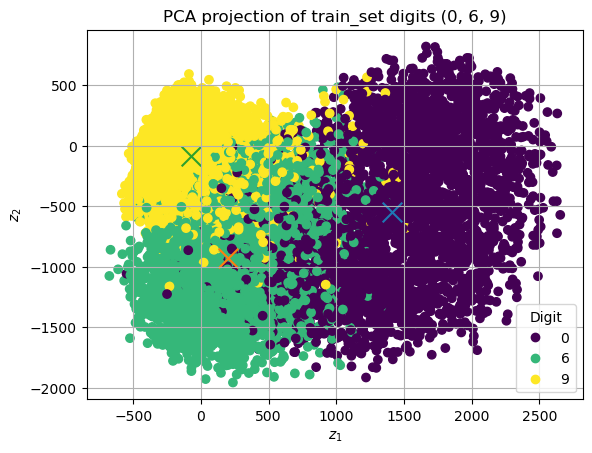

In [351]:
# Visualize the clusters
## WE ARE APPLYING THE PCA FOR VISUALIZATION PURPOUSES, NOT FOR CLUSTERING. THE CLUSTERING IS DONE THROUGH LABELS
 
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot for the PCA-projected data
ax = plt.scatter(Z_train[0, :], Z_train[1, :], c=y_train_b)
plt.legend(*ax.legend_elements(), title="Digit")  # Add to the legend the list of digits
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title(f"PCA projection of train_set digits {a, b, c}")


def average_distance_computation( Z_train, y_train_b, dim_a, dim_b):
    # Compute and plot centroids for each cluster
    unique_labels = np.unique(y_train_b)  # Unique digit labels
    centroids = {}
    average_distances = {}


    for label in unique_labels:
        # Extract points belonging to the current cluster
        cluster_points = Z_train[:, y_train_b == label]
        
        # Compute the centroid
        centroid = np.mean(cluster_points, axis=1)
        centroids[label] = centroid
        
        # Plot the centroid as a larger, distinct marker
        plt.scatter(centroid[dim_a], centroid[dim_b], s=200, marker='x')
        # Compute distances from points to the centroid
        distances = np.linalg.norm(cluster_points - centroid[:, np.newaxis], axis=0)
        
        # Compute average distance for the cluster
        average_distances[label] = np.mean(distances)

    for label, avg_distance in average_distances.items():
        print(f"Cluster {label}: Average Distance = {avg_distance}")

    return unique_labels, centroids, average_distances

unique_labels, centroids, average_distances = average_distance_computation(Z_train, y_train_b, 0 ,1)

plt.legend(*ax.legend_elements(), title="Digit")  # Re-add legend for clarity
plt.grid()
plt.show()


Cluster 0: Average Distance = 713.7330073032044
Cluster 6: Average Distance = 539.454832003106
Cluster 9: Average Distance = 366.19016938683865


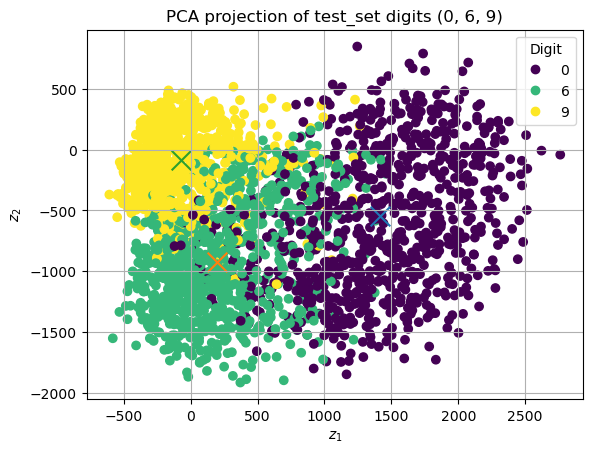

In [352]:
X_test_T_b = X_test_b.T
Z_test = P @ X_test_T_b
ax = plt.scatter(Z_test[0, :], Z_test[1, :], c=y_test_b)
plt.legend(*ax.legend_elements(), title="Digit")  # Add to the legend the list of digits
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title(f"PCA projection of test_set digits {a, b, c}")

# Compute and plot centroids for each cluster
def avg_distances_test(Z_test, Z_train, y_test_b, y_train_b):
    average_distances_test = {}


    for label in unique_labels:
        # Extract points belonging to the current cluster
        cluster_points = Z_train[:, y_train_b == label]
        cluster_points_test = Z_test[:, y_test_b == label]
        # Compute the centroid
        centroid = np.mean(cluster_points, axis=1)
        centroids[label] = centroid
        
        # Plot the centroid as a larger, distinct marker
        plt.scatter(centroid[0], centroid[1], s=200, marker='x')
    
        # Compute distances from points to the centroid
        distances_test = np.linalg.norm(cluster_points_test - centroid[:, np.newaxis], axis=0)
        
        # Compute average distance for the cluster
        average_distances_test[label] = np.mean(distances_test)

    for label, avg_distance in average_distances_test.items():
        print(f"Cluster {label}: Average Distance = {avg_distance}")
    return average_distances
average_distances_test = avg_distances_test(Z_test, Z_train, y_test_b, y_train_b)

plt.legend(*ax.legend_elements(), title="Digit")  # Re-add legend for clarity
plt.grid()
plt.show()

It's possible to notice how the average distance of the clusters' elements from the test set and the centroid previosuly computed on the train_set is pretty close to the average distances previously computated between train_set clusters and their respective centroids.

This can lead us to think that the centroids we calculated are a good representations of the projection onto the Z space for a possible handwritten digit.

In [368]:
def print_centroids():
    print("--- CENTROIDS ---")
    j = 0
    for i in [a,b,c]:
        print(f"coordinates centroid for {i} : {np.round(centroids[i], 1)}")
        j+=1
print_centroids()


--- CENTROIDS ---
coordinates centroid for 0 : [ 1.4120e+03 -5.4930e+02 -1.0580e+02  1.2197e+03 -1.0260e+02 -1.2810e+02
  6.0000e-01]
coordinates centroid for 6 : [ 199.3 -923.6  549.4 1117.6 -258.5  -78.6  -29.1]
coordinates centroid for 9 : [ -73.5  -87.2 -213.5 1418.9 -253.7  -92.   -51.8]


Your chosen input is 


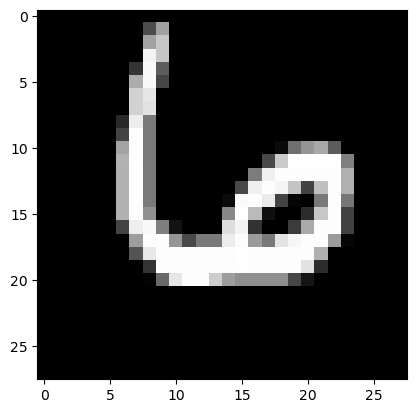

its predicted value is 6
The distance from the centroid is 613.1958471098944


In [354]:
## We procede writing a classifying function that takes advantage of the distance of elements from the centroids
def classifier_b_test():
    n = np.random.randint(0, X_test_b.shape[1])
    x = X_test_b[n]

    z = P@x

    # We compute the distance of the input's projection to the centroids
    # so that we can estimate which is the cluster it's more likely to belong to
    d2 = float(np.linalg.norm(z.T - centroids[a].T))  # L2 norm (Euclidean distance) for d1
    d3 = float(np.linalg.norm(z.T - centroids[b].T))
    d4 = float(np.linalg.norm(z.T - centroids[c].T))
    h = {d2 : a, d3: b, d4: c}
    classification = h[min([d2, d3, d4])]

    
    print(f"Your chosen input is ")
    visualize(X_test_T_b, n)
    print(f"its predicted value is {classification}")
    print(f"The distance from the centroid is {min([d2, d3, d4])}")
classifier_b_test()

In [356]:
## Misclassification
def classifier_b_test_not_random(n):
    # n = np.random.randint(0, X_test_b.shape[1])
    x = X_test_b[n]
    z = P@x

    d2 = float(np.linalg.norm(z.T - centroids[a].T))  # L2 norm (Euclidean distance) for d1
    d3 = float(np.linalg.norm(z.T - centroids[b].T))
    d4 = float(np.linalg.norm(z.T - centroids[c].T))

    h = {d2: a, d3: b, d4: c}

    classification = h[min([d2, d3, d4])]

  
    return int(classification)


def compute_misclassification_rate(Z_test, Y_test):

    N_test = Z_test.shape[1]  # Number of test points
    misclassified = 0
    for i in range(N_test):
        pred = classifier_b_test_not_random(i)
        if pred != Y_test[i]:
            misclassified += 1

    
    # Compute misclassification rate
    
    MR = misclassified / N_test
    return MR
print(f"Your missclassification rate for the digits {a, b, c} is of :")
print(round(compute_misclassification_rate(Z_test, y_test_b), 3))

Your missclassification rate for the digits (0, 6, 9) is of :
0.155


New experiment with different k value  

Cluster 0: Average Distance = 1194.2706400826441
Cluster 6: Average Distance = 981.7978238451138
Cluster 9: Average Distance = 858.7379893071683


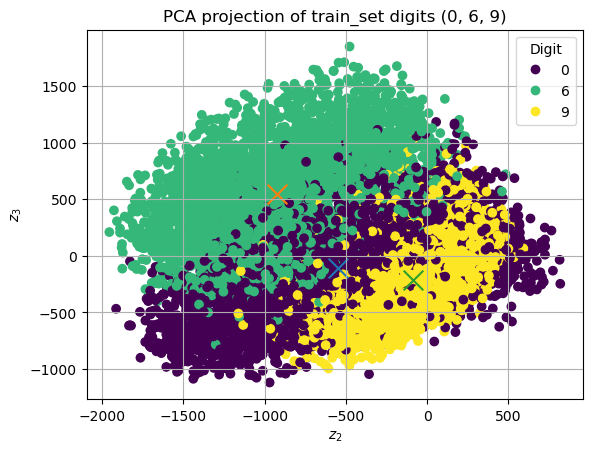

In [359]:
k = 7
X_train_T_b, X_test_T_b, cX, Xc, P, Z_train = centroid_computation(k)
# Scatter plot for the PCA-projected data
ax = plt.scatter(Z_train[1, :], Z_train[2, :], c=y_train_b)
plt.legend(*ax.legend_elements(), title="Digit")  # Add to the legend the list of digits
plt.xlabel(r"$z_2$")
plt.ylabel(r"$z_3$")
plt.title(f"PCA projection of train_set digits {a, b, c}")
unique_labels, centroids, average_distances = average_distance_computation(Z_train, y_train_b, 1, 2)
plt.legend(*ax.legend_elements(), title="Digit")  # Re-add legend for clarity
plt.grid()
plt.show()


The plot above shows the representation of the projection of the train set on Z on the secon and third dimensions. From this we can notice how much less separated the clusters appear to be. 

In [345]:
## proof of a different shape of Z_train
Z_train.shape

(7, 9965)

In [369]:
print_centroids()

--- CENTROIDS ---
coordinates centroid for 0 : [ 1.4120e+03 -5.4930e+02 -1.0580e+02  1.2197e+03 -1.0260e+02 -1.2810e+02
  6.0000e-01]
coordinates centroid for 6 : [ 199.3 -923.6  549.4 1117.6 -258.5  -78.6  -29.1]
coordinates centroid for 9 : [ -73.5  -87.2 -213.5 1418.9 -253.7  -92.   -51.8]


In [380]:
print(f"Your missclassification rate for k = {k} for the digits {a, b, c} is of :")
print(round(compute_misclassification_rate(Z_test, y_test_b), 3))

Your missclassification rate for k = 7 for the digits (0, 6, 9) is of :
0.049


The new MR is less than a third of the previous result! adding dimensions to our k_approssimation allows our model to improve it's performance by a significant amount, taking into considerations details that where previously ignored in a more rough k-approcimation (like k = 2)

Now let's try the same experiment but for much closer digits, for example 1, 7 and 9

Cluster 1: Average Distance = 827.4358645353924
Cluster 7: Average Distance = 1014.6204389318302
Cluster 9: Average Distance = 952.0964626219753


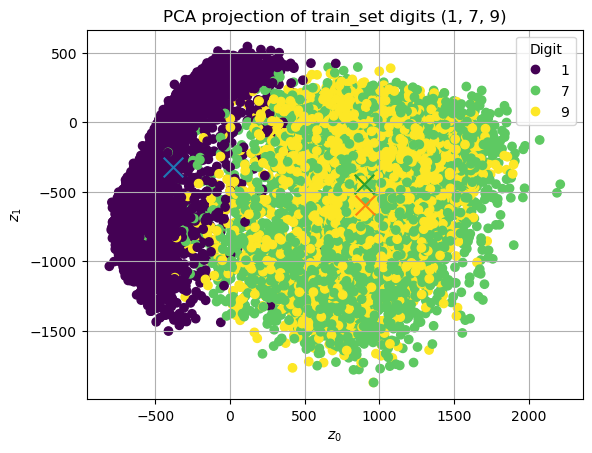

In [382]:
a, b, c = 1, 7, 9
X_train_b, X_test_b, y_train_b, y_test_b = masking(a, b, c)
k = 7
X_train_T_b, X_test_T_b, cX, Xc, P, Z_train = centroid_computation(k)
# Scatter plot for the PCA-projected data
ax = plt.scatter(Z_train[0, :], Z_train[1, :], c=y_train_b)
plt.legend(*ax.legend_elements(), title="Digit")  # Add to the legend the list of digits
plt.xlabel(r"$z_0$")
plt.ylabel(r"$z_1$")
plt.title(f"PCA projection of train_set digits {a, b, c}")
unique_labels, centroids, average_distances = average_distance_computation(Z_train, y_train_b, 0, 1)
plt.legend(*ax.legend_elements(), title="Digit")  # Re-add legend for clarity
plt.grid()
plt.show()

It's already pretty clear that the representation in the first two axis of the projection in the Z space is quite unsucceful in descerning a clear cluster of 7 and 9 features. We keep analyzing the datas in the hope that this behaviour is corrected with the details contained in the other 5 dimensions of the k-approximation

In [383]:
print_centroids()

--- CENTROIDS ---
coordinates centroid for 1 : [-381.6 -321.8 -284.3 -508.2 -327.4  245.   945.1]
coordinates centroid for 7 : [ 904.5 -598.5 -378.4 -260.3 -112.3  304.5  933.4]
coordinates centroid for 9 : [ 895.2 -443.2 -164.8 -884.6 -400.3  287.5  801.8]


In [384]:
print(f"Your missclassification rate for k = {k} for the digits {a, b, c} is of :")
print(round(compute_misclassification_rate(Z_test, y_test_b), 3))

Your missclassification rate for k = 7 for the digits (1, 7, 9) is of :
0.088


Our Misclassification Rate ends up being a bit worse than the one previously calculated on the digits 0, 6, 9, yet still delivering a reliable answer in 92% of the inputs given

Out of curiosity we can measure the misclassification rate for the input we just tested but for a lower k value (for example 2)

Cluster 1: Average Distance = 480.722381260715
Cluster 7: Average Distance = 627.1795400936953
Cluster 9: Average Distance = 516.8110727208631


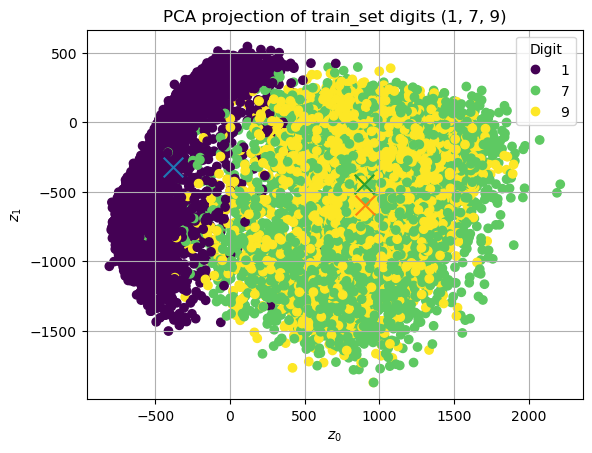

In [385]:
a, b, c = 1, 7, 9
X_train_b, X_test_b, y_train_b, y_test_b = masking(a, b, c)
k = 2
X_train_T_b, X_test_T_b, cX, Xc, P, Z_train = centroid_computation(k)
# Scatter plot for the PCA-projected data
ax = plt.scatter(Z_train[0, :], Z_train[1, :], c=y_train_b)
plt.legend(*ax.legend_elements(), title="Digit")  # Add to the legend the list of digits
plt.xlabel(r"$z_0$")
plt.ylabel(r"$z_1$")
plt.title(f"PCA projection of train_set digits {a, b, c}")
unique_labels, centroids, average_distances = average_distance_computation(Z_train, y_train_b, 0, 1)
plt.legend(*ax.legend_elements(), title="Digit")  # Re-add legend for clarity
plt.grid()
plt.show()

In [386]:
print(f"Your missclassification rate for k = {k} for the digits {a, b, c} is of :")
print(round(compute_misclassification_rate(Z_test, y_test_b), 3))

Your missclassification rate for k = 2 for the digits (1, 7, 9) is of :
0.286


We indeed obtain a very poor performance, the model can indeed distinguish the digit 1 with not much trouble, while it struggles to take apart 7 from 9. From this high level on uncertainty on these two digits might come the MR of 0.29.